# Analysis of unstructured data

### Marcin Jakubwski, Dominika Struzik

## ASSIGNMENT 6

As an assignment we needed to choose the book which we would like to analyse. We decide to pick the one that we all know, probably all of us read in the childhood, but for sure we all are fimiliar with their main characters.

In [38]:
from nltk.tokenize import RegexpTokenizer,word_tokenize,sent_tokenize
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

In [2]:
plt.rcParams['figure.figsize'] = [15, 6]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

In [3]:
file = open("winnie_the_pooh.txt")
book = file.read()
file.close()

In [4]:
Tokenizer = RegexpTokenizer(r"[A-Za-z0-9-]+")
separated_book = Tokenizer.tokenize(book)

In [5]:
stopwords = stopwords.words("english")

In [6]:
separated_book_cleaned = [word for word in separated_book if word.lower() not in stopwords]

In [7]:
separator = ' '
book_cleaned = separator.join(separated_book_cleaned)

In [8]:
len(separated_book_cleaned)

10467

We have assumed that there are around 200 words per page  - without stopwords.

In [9]:
pages = []
i = 200
separator = ' '
condition = True
max_len = len(separated_book_cleaned)

while condition:
    if i <= max_len:
        pages.append(separator.join(separated_book_cleaned[i-200:i]))
    else:
        pages.append(separator.join(separated_book_cleaned[i-200:]))
        condition = False
    i += 200

In [10]:
len(pages)

53

Let us check how many of main characters of the book are mentioned per each page - *Winnie the Pooh*

At fisrt we will try to find them using the spacy library. 

In [11]:
NER = spacy.load("en_core_web_sm")

In [12]:
book_cleaned2 = NER(book)
characters = []
for word in book_cleaned2.ents:
    if word.label_ == 'PERSON':
        characters.append(word.text)
        #print(word.text,word.label_)  

In [13]:
characters = list(set(characters))

In [14]:
characters

['A. A. M.',
 'Cottleston Pie',
 'Wobbles',
 "Christopher Robin's",
 'William',
 'Winnie-The-Pooh - Chapter',
 'Eeyore',
 'a Long Start',
 'CHRISTOPHER ROBIN',
 'Christopher Robin\n',
 'Trespassers William',
 'Christopher',
 'Without Pooh',
 'Pooh',
 'Wizzles',
 'bush',
 'Trespassers W',
 'Helping Bear',
 'Edward Bear',
 'Winnie-the-Pooh',
 'Alexander Beetle',
 'Ho',
 'Woozles',
 'Escape',
 'Heffalumps',
 'Henry Pootel',
 'Climbing Trees',
 'Zoo',
 'Ist Mate',
 'Wild Woozles',
 'Grandfather T. W.',
 'a Loud Noise Until',
 'Pooh Bear',
 'Acre Wood',
 'Roo',
 'Piglet',
 'Baby Roo',
 'Cunning Trap',
 'Sing Ho',
 'Rhododendron',
 'the Queen Bee',
 'PooH',
 'Loud Sounds',
 'Christopher Robin',
 'mulberry bush\n',
 'Bear Pooh',
 'C. Robin',
 'Buzz',
 'a Cunning Trap',
 'Henry Pootel Piglet',
 'Robin',
 'Tail',
 'Nuts',
 'F.O.P.',
 'Pooh You',
 'Little Piglet',
 'mulberry bush',
 'Kanga']

As we can see there occured some issues with finding the corect names of main characters. First problem could be the fact that most of them are names of animals, which can be wrongly interpreted by the NER identifier.

We know the names of main characters, so we have manualy stated them in the list, to properly perform further analyses.

In [15]:
char_per_page = dict()
characters = ['Pooh', 'Christopher', 'Piglet', 'Tigger', 'Eeyore', 'Rabbit', 'Roo', 'Kanga', 'Owl']
for char in characters:
    char_mentions = []
    for page in pages:
        char_mentions.append(page.count(char))
    char_per_page[char] = char_mentions

Winnie the Pooh is the title character of the book, so we assume that occurence of this name in the book is pretty hight. Let us check it!

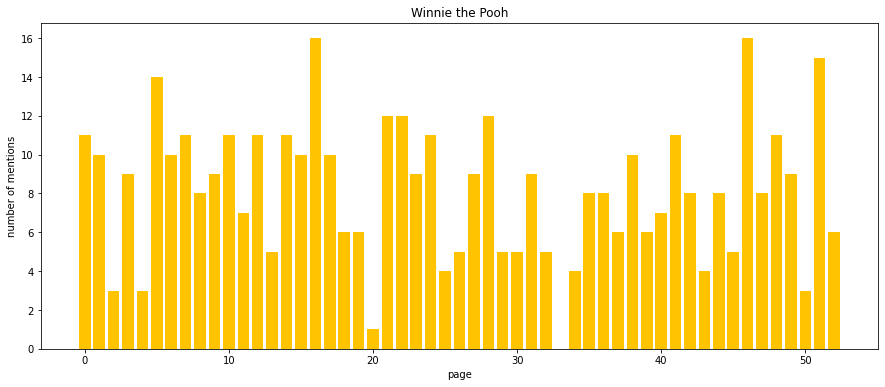

In [16]:
figsize=(20,15)
x = np.arange(len(char_per_page['Pooh']))

plt.xlabel('page')
plt.ylabel('number of mentions')
plt.title('Winnie the Pooh')
plt.bar(x, char_per_page['Pooh'],color='#FFC300')
plt.show()

From the first page there is a huge number of mentions of Winnie. There is just one page, where we cannot find even one time the name of the Pooh.

Let us check also the occurence of Pooh's best friends.

In [17]:
for name in char_per_page:
    print(str(name)+': '+str(max(char_per_page[name])))

Pooh: 16
Christopher: 10
Piglet: 15
Tigger: 0
Eeyore: 16
Rabbit: 13
Roo: 11
Kanga: 12
Owl: 11


Tigger was intoduced as a new character in the second book of Winnie the Pooh stories.

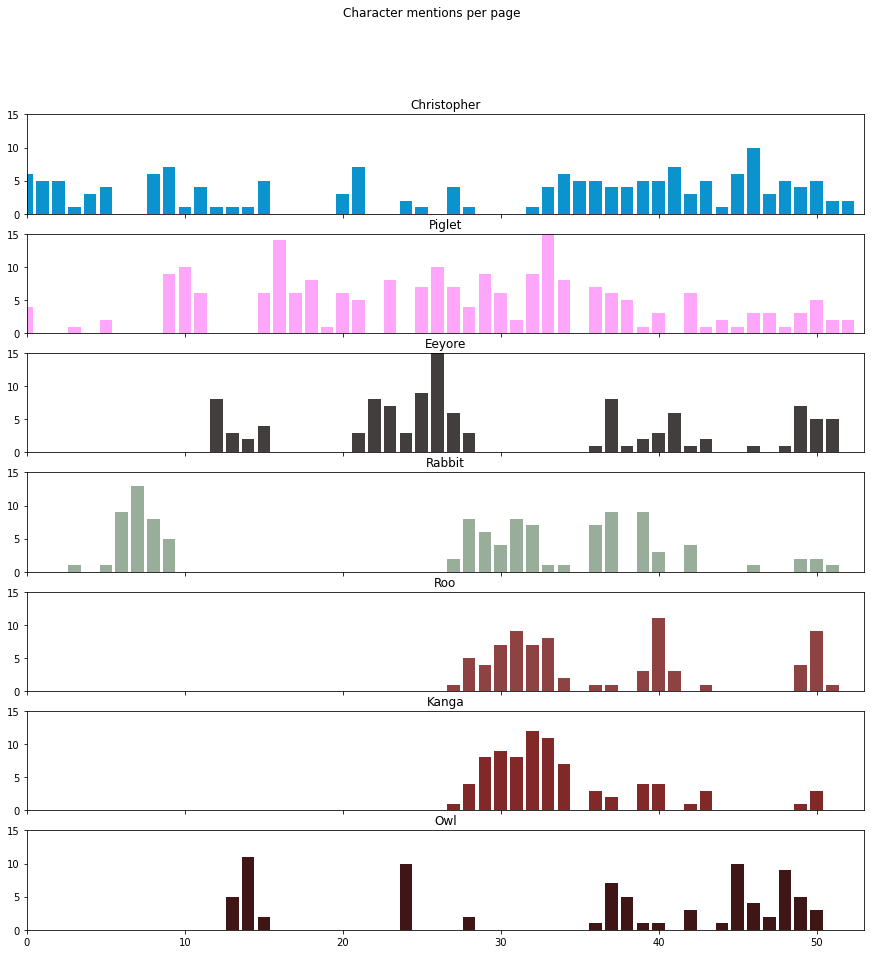

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex=True, figsize=(15,15))

x = np.arange(len(char_per_page['Pooh']))
limits = [0, 53, 0, 15]

ax1.set_title('Christopher')
ax1.axis(limits)
ax1.bar(x, char_per_page['Christopher'],color='#0B93CE')

ax2.set_title('Piglet')
ax2.axis(limits)
ax2.bar(x, char_per_page['Piglet'],color='#FEA6FA')

ax3.set_title('Eeyore')
ax3.axis(limits)
ax3.bar(x, char_per_page['Eeyore'],color='#423E3E')

ax4.set_title('Rabbit')
ax4.axis(limits)
ax4.bar(x, char_per_page['Rabbit'],color='#98AE9B')

ax5.set_title('Roo')
ax5.axis(limits)
ax5.bar(x, char_per_page['Roo'],color='#8E4242')

ax6.set_title('Kanga')
ax6.axis(limits)
ax6.bar(x, char_per_page['Kanga'],color='#812929')

ax7.set_title('Owl')
ax7.axis(limits)
ax7.bar(x, char_per_page['Owl'],color='#401515')

plt.suptitle('Character mentions per page')
plt.savefig('character_mentions_per_page.png')
plt.show()

Right away we can see that Kanga and Roo amlost alwayes occures together in the book, as Kanga is the Roo's mum. 
Owl was always the wise advisor, so based on its occurence, we can see when Winnie and his friends encountered some issues or problems that needed to be handled.

Let us now check how often the main characters are mentioned in each chapter.

In [19]:
separator = 'Chapter'
chapters = book_cleaned.split(separator)
chapters = chapters[1:]

In [20]:
char_per_chapter = dict()

for char in characters:
    char_mentions = []
    for chapter in chapters:
        char_mentions.append(chapter.count(char))
    char_per_chapter[char] = char_mentions

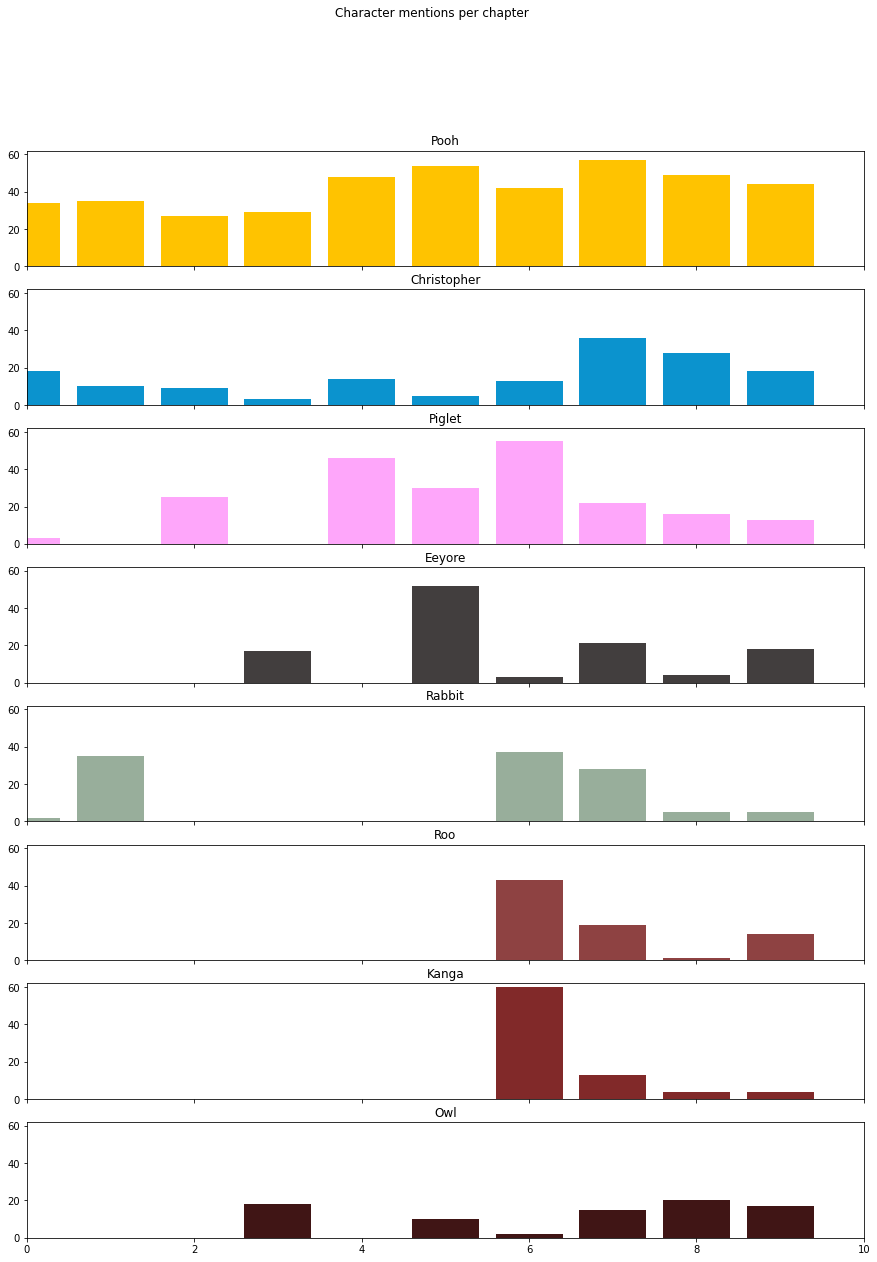

In [21]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(8, 1, sharex=True, figsize=(15,20))

x = np.arange(len(char_per_chapter['Pooh']))
limits = [ 0, 10, 0, 62]

ax0.set_title('Pooh')
ax0.axis(limits)
ax0.bar(x, char_per_chapter['Pooh'],color='#FFC300')

ax1.set_title('Christopher')
ax1.axis(limits)
ax1.bar(x, char_per_chapter['Christopher'],color='#0B93CE')

ax2.set_title('Piglet')
ax2.axis(limits)
ax2.bar(x, char_per_chapter['Piglet'],color='#FEA6FA')

ax3.set_title('Eeyore')
ax3.axis(limits)
ax3.bar(x, char_per_chapter['Eeyore'],color='#423E3E')

ax4.set_title('Rabbit')
ax4.axis(limits)
ax4.bar(x, char_per_chapter['Rabbit'],color='#98AE9B')

ax5.set_title('Roo')
ax5.axis(limits)
ax5.bar(x, char_per_chapter['Roo'],color='#8E4242')

ax6.set_title('Kanga')
ax6.axis(limits)
ax6.bar(x, char_per_chapter['Kanga'],color='#812929')

ax7.set_title('Owl')
ax7.axis(limits)
ax7.bar(x, char_per_chapter['Owl'],color='#401515')

plt.suptitle('Character mentions per chapter')
plt.savefig('character_mentions_per_chapter.png')
plt.show()

In [22]:
import re
file2 = open("winnie_the_pooh.txt",'r')

doclist = [ line for line in file2 ]
docstr = '' . join(doclist)
sentences = re.split(r'[.!?]', docstr)
file2.close()

In [23]:
sentences2 = []
for i in range(len(sentences)):
    sentences2.append(Tokenizer.tokenize(sentences[i]))

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
separator = ' '
sentences2_1 = []
for i in range(len(sentences2)):
        sentences2_1.append(separator.join(sentences2[i]))

In [26]:
sentence_polarity = []

sia = SIA()

for sentence in sentences2_1:
    sentence_polarity.append(sia.polarity_scores(sentence))

In [27]:
sentence_polarity = pd.DataFrame(sentence_polarity)

In [28]:
sentences2_1 = pd.DataFrame(sentences2_1)

In [29]:
joined_df= sentence_polarity.join(sentences2_1, on=sentence_polarity.index)
joined_df = joined_df.rename(columns = {0:'oryginal_sentences'})
joined_df = joined_df.where(~(joined_df.oryginal_sentences==''))
joined_df = joined_df[~joined_df['oryginal_sentences'].isnull()]
joined_df

neg    neu    pos  compound  \
0     0.0  0.726  0.274    0.7506   
1     0.0  0.612  0.388    0.2263   
2     0.0  1.000  0.000    0.0000   
3     0.0  0.588  0.412    0.6369   
4     0.0  1.000  0.000    0.0000   
...   ...    ...    ...       ...   
2250  0.0  1.000  0.000    0.0000   
2251  0.0  0.707  0.293    0.4404   
2252  0.0  1.000  0.000    0.0000   
2253  0.0  1.000  0.000    0.0000   
2256  0.0  1.000  0.000    0.0000   

                                     oryginal_sentences  
0     Winnie-The-Pooh - Introduction To her Hand in ...  
1                                  Say you re surprised  
2                         Say it s just what you wanted  
3              Because it s yours - because we love you  
4     INTRODUCTION IF you happen to have read anothe...  
...                                                 ...  
2250                                     I might I said  
2251        Was Pooh s pencil case any better than mine  
2252                        It was just the same I said  
2253                             He nodded and went out  
2256  and in a moment I heard Winnie-the-Pooh--bump ...  

[2088 rows x 5 columns]

In [30]:
pos = 0
neg = 0
neu = 0
for i in joined_df.index:
    if joined_df.compound[i] > 0:
        pos = pos+1
    if joined_df.compound[i] < 0:
        neg = neg+1
    if joined_df.compound[i] == 0:
        neu = neu+1

In [31]:
pos

603

In [32]:
neg

227

In [33]:
neu

1258

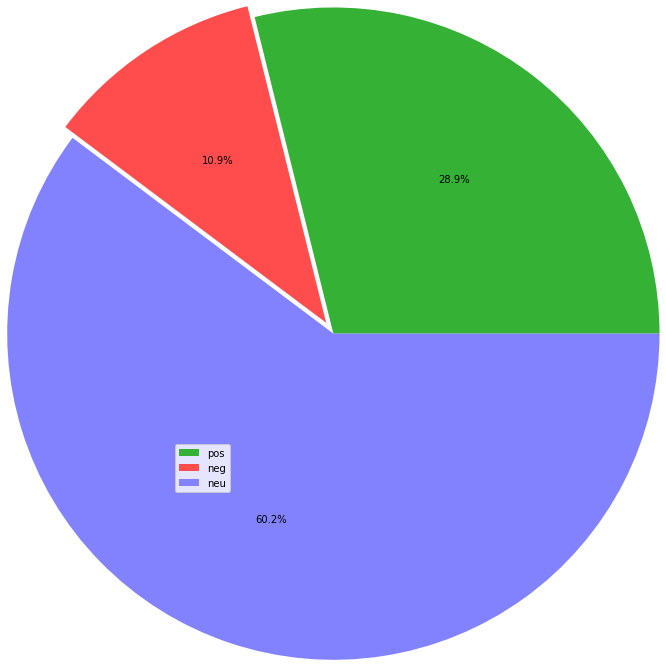

In [34]:
explode = [0,0.1,0]
colors = ['#35b235','#ff4d4d', '#8282ff']
plt.pie([pos,neg,neu], explode=explode, colors=colors, autopct='%1.1f%%', radius=2.5)
plt.legend(['pos','neg','neu'], loc='lower left')
plt.show()

We have checked polarity of each sentence, and we can see that most fof them were neutral, and not event 11% were classified as negative, which we would expect from the book for kids.

We would also like to check what kind of words in each group occures the most often.

In [35]:
 def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

joined_df['Cleaned sentences'] = joined_df['oryginal_sentences'].apply(clean)

In [36]:
joined_df

neg    neu    pos  compound  \
0     0.0  0.726  0.274    0.7506   
1     0.0  0.612  0.388    0.2263   
2     0.0  1.000  0.000    0.0000   
3     0.0  0.588  0.412    0.6369   
4     0.0  1.000  0.000    0.0000   
...   ...    ...    ...       ...   
2250  0.0  1.000  0.000    0.0000   
2251  0.0  0.707  0.293    0.4404   
2252  0.0  1.000  0.000    0.0000   
2253  0.0  1.000  0.000    0.0000   
2256  0.0  1.000  0.000    0.0000   

                                     oryginal_sentences  \
0     Winnie-The-Pooh - Introduction To her Hand in ...   
1                                  Say you re surprised   
2                         Say it s just what you wanted   
3              Because it s yours - because we love you   
4     INTRODUCTION IF you happen to have read anothe...   
...                                                 ...   
2250                                     I might I said   
2251        Was Pooh s pencil case any better than mine   
2252                        It was just the same I said   
2253                             He nodded and went out   
2256  and in a moment I heard Winnie-the-Pooh--bump ...   

                                      Cleaned sentences  
0     Winnie The Pooh Introduction To her Hand in ha...  
1                                  Say you re surprised  
2                         Say it s just what you wanted  
3                Because it s yours because we love you  
4     INTRODUCTION IF you happen to have read anothe...  
...                                                 ...  
2250                                     I might I said  
2251        Was Pooh s pencil case any better than mine  
2252                        It was just the same I said  
2253                             He nodded and went out  
2256  and in a moment I heard Winnie the Pooh bump b...  

[2088 rows x 6 columns]

In [39]:
 pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

joined_df['POS tagged'] = joined_df['Cleaned sentences'].apply(token_stop_pos)

In [40]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

joined_df['Lemma'] = joined_df['POS tagged'].apply(lemmatize)

In [41]:
pos_sent = list(joined_df[joined_df.compound > 0].Lemma)
pos_words = []
for i in range(len(pos_sent)):
    sep_pos = Tokenizer.tokenize(pos_sent[i])
    for j in range(len(sep_pos)):
        pos_words.append(sep_pos[j])
import collections
counter_pos=collections.Counter(pos_words)
sorted_x = sorted(counter_pos.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict_list = list(sorted_dict.keys())
sorted_dict_list[-20:]

['good',
 'could',
 'Owl',
 'get',
 'Yes',
 'Bear',
 'know',
 'come',
 'would',
 'Well',
 'look',
 'Rabbit',
 'think',
 'Christopher',
 'Robin',
 'go',
 'like',
 'Piglet',
 'Pooh',
 'say']

In [42]:
neg_sent = list(joined_df[joined_df.compound < 0].Lemma)
neg_words = []
for i in range(len(neg_sent)):
    neg_pos = Tokenizer.tokenize(neg_sent[i])
    for j in range(len(neg_pos)):
        neg_words.append(neg_pos[j])
import collections
counter_neg=collections.Counter(neg_words)
sorted_x_neg = sorted(counter_neg.items(), key=lambda kv: kv[1])
sorted_dict_neg = collections.OrderedDict(sorted_x_neg)
sorted_dict_list_neg = list(sorted_dict_neg.keys())
sorted_dict_list_neg[-20:]

['see',
 'Roo',
 'know',
 'would',
 'cry',
 'little',
 'round',
 'go',
 'time',
 'come',
 'Rabbit',
 'look',
 'get',
 'think',
 'Christopher',
 'Robin',
 'Eeyore',
 'Piglet',
 'Pooh',
 'say']

In [43]:
neu_sent = list(joined_df[joined_df.compound == 0].Lemma)
neu_words = []
for i in range(len(neg_sent)):
    neu_pos = Tokenizer.tokenize(neu_sent[i])
    for j in range(len(neu_pos)):
        neu_words.append(neu_pos[j])
import collections
counter_neu=collections.Counter(neu_words)
sorted_x_neu = sorted(counter_neu.items(), key=lambda kv: kv[1])
sorted_dict_neu = collections.OrderedDict(sorted_x_neu)
sorted_dict_list_neu = list(sorted_dict_neu.keys())
sorted_dict_list_neu[-20:]

['Piglet',
 'paw',
 'front',
 'come',
 'time',
 'door',
 'climb',
 'balloon',
 'little',
 'call',
 'go',
 'ask',
 'get',
 'Rabbit',
 'Winnie',
 'Christopher',
 'Robin',
 'think',
 'Pooh',
 'say']

In [44]:
pos_sent = list(joined_df[joined_df.compound > 0].Lemma)
pos_words = []
for i in range(len(pos_sent)):
    sep_pos = Tokenizer.tokenize(pos_sent[i])
    for j in range(len(sep_pos)):
        pos_words.append(sep_pos[j])
import collections
counter_pos=collections.Counter(pos_words)
sorted_x = sorted(counter_pos.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict_list = list(sorted_dict.keys())
sorted_dict_list[-20:]

['good',
 'could',
 'Owl',
 'get',
 'Yes',
 'Bear',
 'know',
 'come',
 'would',
 'Well',
 'look',
 'Rabbit',
 'think',
 'Christopher',
 'Robin',
 'go',
 'like',
 'Piglet',
 'Pooh',
 'say']

In [45]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

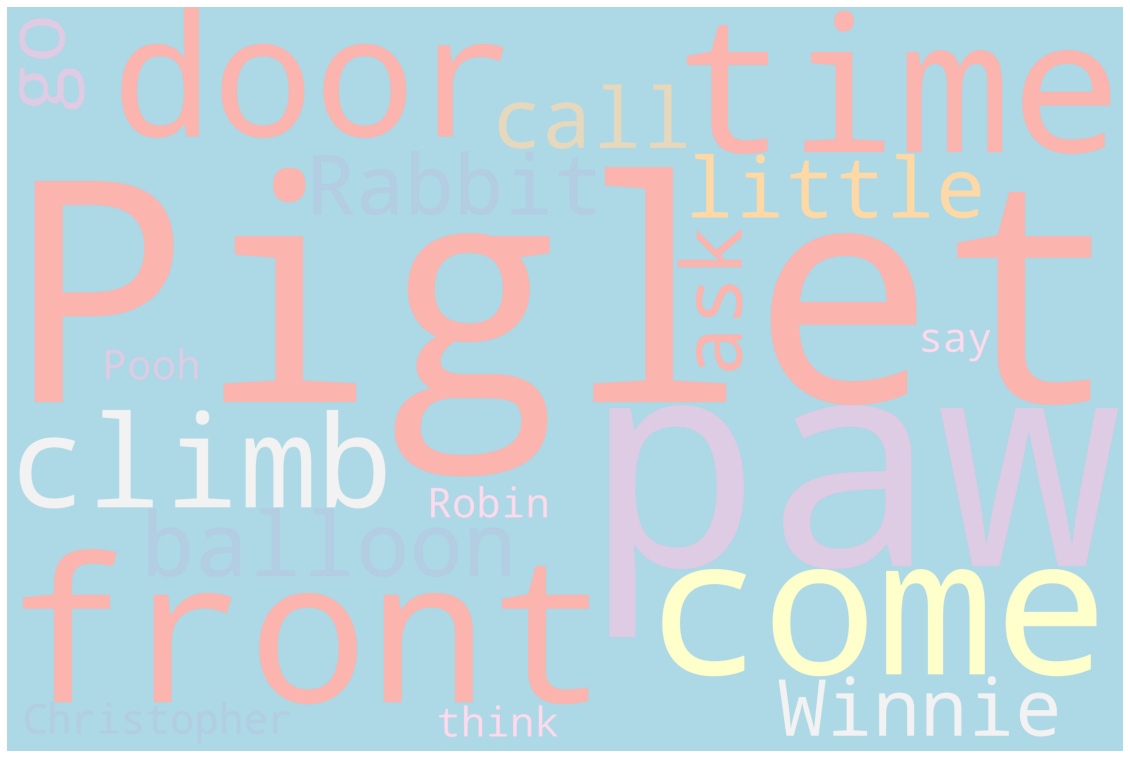

In [46]:
separator = " "
text = separator.join(sorted_dict_list_neu[-20:])
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='lightblue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

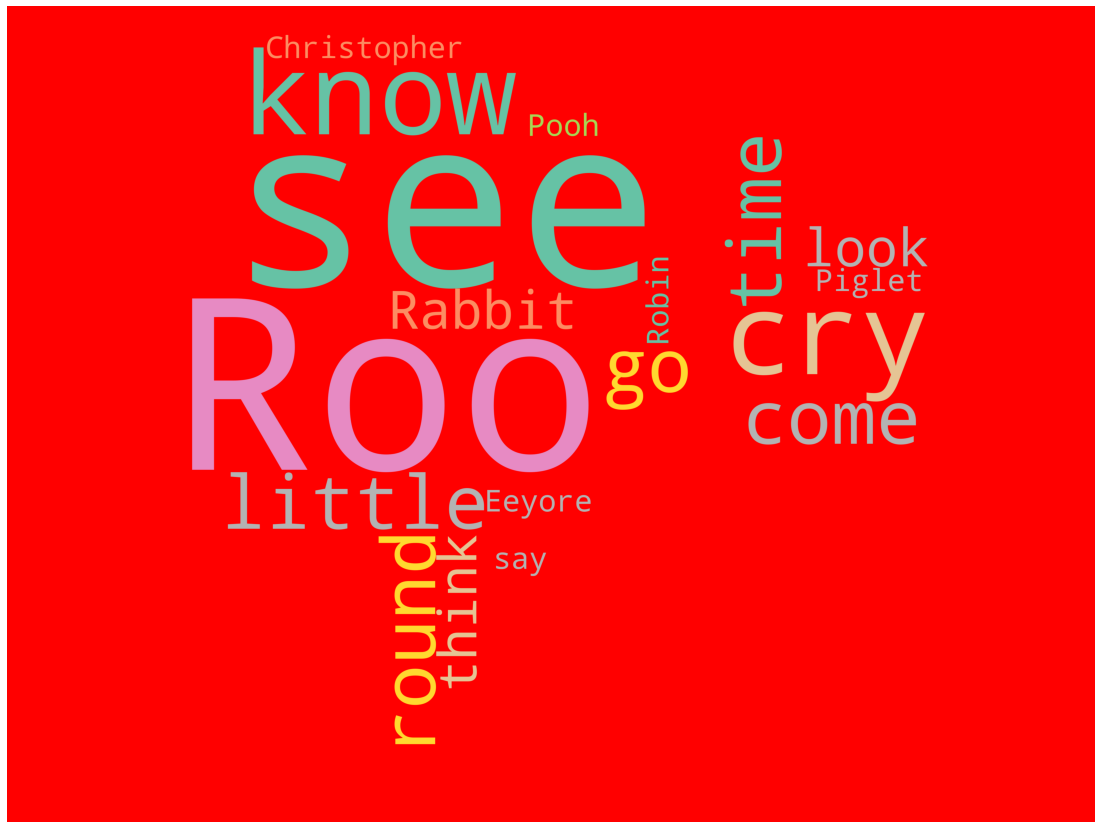

In [47]:
separator = " "
text = separator.join(sorted_dict_list_neg[-20:])
import numpy as np
from PIL import Image
mask = np.array(Image.open('downvote.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plot_cloud(wordcloud)

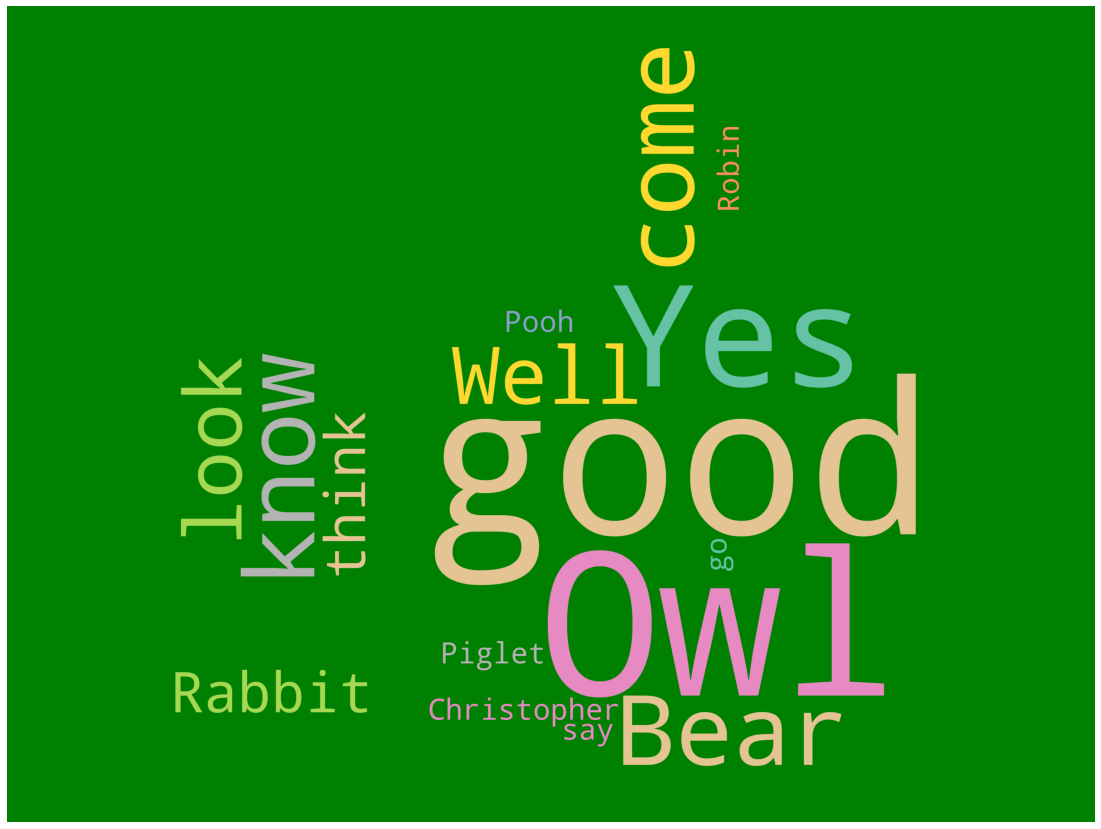

In [48]:
separator = " "
text = separator.join(sorted_dict_list[-20:])
import numpy as np
from PIL import Image
mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='green', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plot_cloud(wordcloud)

### Cooccurance of characters per page (GRAPH)

In [49]:
df_char_per_page_num = pd.DataFrame(char_per_page)
occurances = df_char_per_page_num.sum()

In [50]:
occurances

Pooh           433
Christopher    160
Piglet         214
Tigger           0
Eeyore         115
Rabbit         112
Roo             77
Kanga           81
Owl             82
dtype: int64

In [51]:
df_char_per_page = pd.DataFrame(char_per_page)
df_char_per_page = df_char_per_page.astype(bool).astype(int)
df_char_per_page

Pooh  Christopher  Piglet  Tigger  Eeyore  Rabbit  Roo  Kanga  Owl
0      1            1       1       0       0       0    0      0    0
1      1            1       0       0       0       0    0      0    0
2      1            1       0       0       0       0    0      0    0
3      1            1       1       0       0       1    0      0    0
4      1            1       0       0       0       0    0      0    0
5      1            1       1       0       0       1    0      0    0
6      1            0       0       0       0       1    0      0    0
7      1            0       0       0       0       1    0      0    0
8      1            1       0       0       0       1    0      0    0
9      1            1       1       0       0       1    0      0    0
10     1            1       1       0       0       0    0      0    0
11     1            1       1       0       0       0    0      0    0
12     1            1       0       0       1       0    0      0    0
13     1            1       0       0       1       0    0      0    1
14     1            1       0       0       1       0    0      0    1
15     1            1       1       0       1       0    0      0    1
16     1            0       1       0       0       0    0      0    0
17     1            0       1       0       0       0    0      0    0
18     1            0       1       0       0       0    0      0    0
19     1            0       1       0       0       0    0      0    0
20     1            1       1       0       0       0    0      0    0
21     1            1       1       0       1       0    0      0    0
22     1            0       0       0       1       0    0      0    0
23     1            0       1       0       1       0    0      0    0
24     1            1       0       0       1       0    0      0    1
25     1            1       1       0       1       0    0      0    0
26     1            0       1       0       1       0    0      0    0
27     1            1       1       0       1       1    1      1    0
28     1            1       1       0       1       1    1      1    1
29     1            0       1       0       0       1    1      1    0
30     1            0       1       0       0       1    1      1    0
31     1            0       1       0       0       1    1      1    0
32     1            1       1       0       0       1    1      1    0
33     0            1       1       0       0       1    1      1    0
34     1            1       1       0       0       1    1      1    0
35     1            1       0       0       0       0    0      0    0
36     1            1       1       0       1       1    1      1    1
37     1            1       1       0       1       1    1      1    1
38     1            1       1       0       1       0    0      0    1
39     1            1       1       0       1       1    1      1    1
40     1            1       1       0       1       1    1      1    1
41     1            1       0       0       1       0    1      0    0
42     1            1       1       0       1       1    0      1    1
43     1            1       1       0       1       0    1      1    0
44     1            1       1       0       0       0    0      0    1
45     1            1       1       0       0       0    0      0    1
46     1            1       1       0       1       1    0      0    1
47     1            1       1       0       0       0    0      0    1
48     1            1       1       0       1       0    0      0    1
49     1            1       1       0       1       1    1      1    1
50     1            1       1       0       1       1    1      1    1
51     1            1       1       0       1       1    1      0    0
52     1            1       1       0       0       0    0      0    0

In [52]:
df_char_per_page = df_char_per_page.astype(int)
coocc = df_char_per_page.T.dot(df_char_per_page)
np.fill_diagonal(coocc.values, 0)
coocc

Pooh  Christopher  Piglet  Tigger  Eeyore  Rabbit  Roo  Kanga  \
Pooh            0           40      39       0      25      22   16     15   
Christopher    40            0      31       0      22      18   14     13   
Piglet         39           31       0       0      19      20   16     16   
Tigger          0            0       0       0       0       0    0      0   
Eeyore         25           22      19       0       0      11   11     10   
Rabbit         22           18      20       0      11       0   15     15   
Roo            16           14      16       0      11      15    0     15   
Kanga          15           13      16       0      10      15   15      0   
Owl            18           18      15       0      15       9    7      8   

             Owl  
Pooh          18  
Christopher   18  
Piglet        15  
Tigger         0  
Eeyore        15  
Rabbit         9  
Roo            7  
Kanga          8  
Owl            0

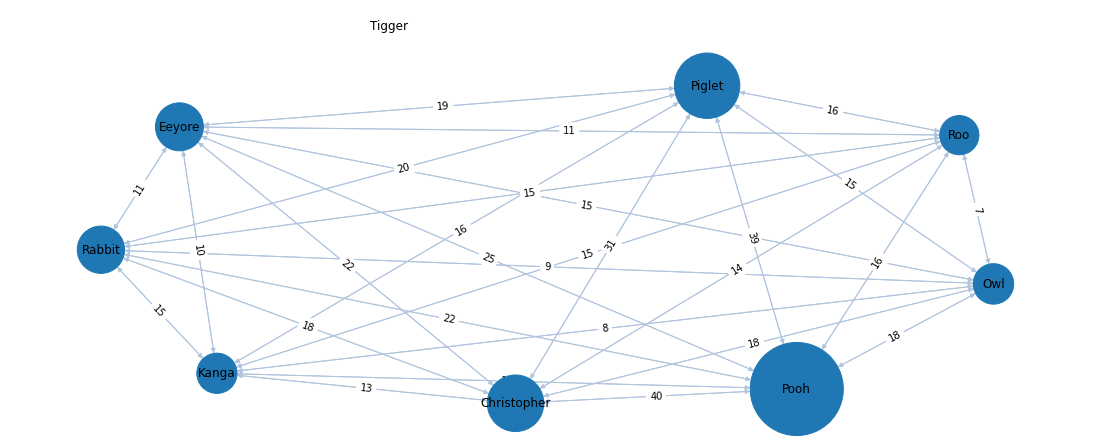

In [56]:
import networkx as nx
G = nx.from_numpy_matrix(np.matrix(coocc), create_using=nx.DiGraph)
mapping = {0:'Pooh', 1:'Christopher', 2:'Piglet', 3:'Tigger', 4:'Eeyore', 5:'Rabbit', 6:'Roo', 7:'Kanga', 8:'Owl'}
G = nx.relabel_nodes(G, mapping)
layout = nx.spring_layout(G, k =10)
labels = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, node_size = (occurances)*20, with_labels = True, font_size=12, edge_color = 'lightsteelblue')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

### Conclusion

- As we would expecte, the most often mentioned character was Winnie the Pooh. 
- Based on the occurence, the best firends of Winnie are Christopher Robin and Piglet.
- The overal polarity of the sentences is neutral, only 11% of them were classified as negative.
- All of the most often used words, in each group, can be found on the 3 last figures.